In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MIMIC-IV Cleaned Master Dataset
df_master = pd.read_pickle('../../MIMIC_IV/df_ckd_master.pkl')

df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14012 entries, 0 to 14011
Columns: 1403 entries, subject_id to Head injury, unspecified
dtypes: Int64(5), datetime64[ns](2), datetime64[us](9), float64(447), int64(928), object(12)
memory usage: 150.1+ MB


In [3]:
# Extract subset of demographic features
sub_demo = df_master.loc[:, 'gender':'insurance']

sub_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14012 entries, 0 to 14011
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             14012 non-null  object
 1   anchor_age         14012 non-null  Int64 
 2   disch_age          14012 non-null  int64 
 3   anchor_year        14012 non-null  Int64 
 4   anchor_year_group  14012 non-null  object
 5   race               14012 non-null  object
 6   language           14012 non-null  object
 7   marital_status     13677 non-null  object
 8   insurance          14012 non-null  object
dtypes: Int64(2), int64(1), object(6)
memory usage: 1012.7+ KB


In [4]:
# Extract subset of first and last CKD diagnostic features
sub_CKD = df_master.loc[:, 'hadm_id_first':'duration']

sub_CKD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14012 entries, 0 to 14011
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   hadm_id_first         14012 non-null  Int64         
 1   admittime_first       14012 non-null  datetime64[us]
 2   hadm_id_last          14012 non-null  Int64         
 3   dischtime_last        14012 non-null  datetime64[us]
 4   hadm_id_first_CKD     14012 non-null  int64         
 5   admittime_CKD         14012 non-null  datetime64[ns]
 6   hadm_id_last_CKD      14012 non-null  int64         
 7   dischtime_CKD         14012 non-null  datetime64[ns]
 8   hospital_expire_flag  14012 non-null  Int64         
 9   deathtime             1329 non-null   datetime64[us]
 10  admission_type        14012 non-null  object        
 11  admit_provider_id     14012 non-null  object        
 12  admission_location    14012 non-null  object        
 13  discharge_locati

In [5]:
# Extract subset of lab features
sub_lab = df_master.loc[:, 'Creatinine_first':'RBC_Casts_median']

sub_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14012 entries, 0 to 14011
Columns: 450 entries, Creatinine_first to RBC_Casts_median
dtypes: datetime64[us](6), float64(444)
memory usage: 48.1 MB


In [6]:
# Extract subset of comorbid conditions features
sub_comorbid = df_master.loc[:, 'Nephritis and nephropathy, not specified as acute or chronic, in diseases classified elsewhere':'Head injury, unspecified']

sub_comorbid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14012 entries, 0 to 14011
Columns: 921 entries, Nephritis and nephropathy, not specified as acute or chronic, in diseases classified elsewhere to Head injury, unspecified
dtypes: int64(921)
memory usage: 98.5 MB


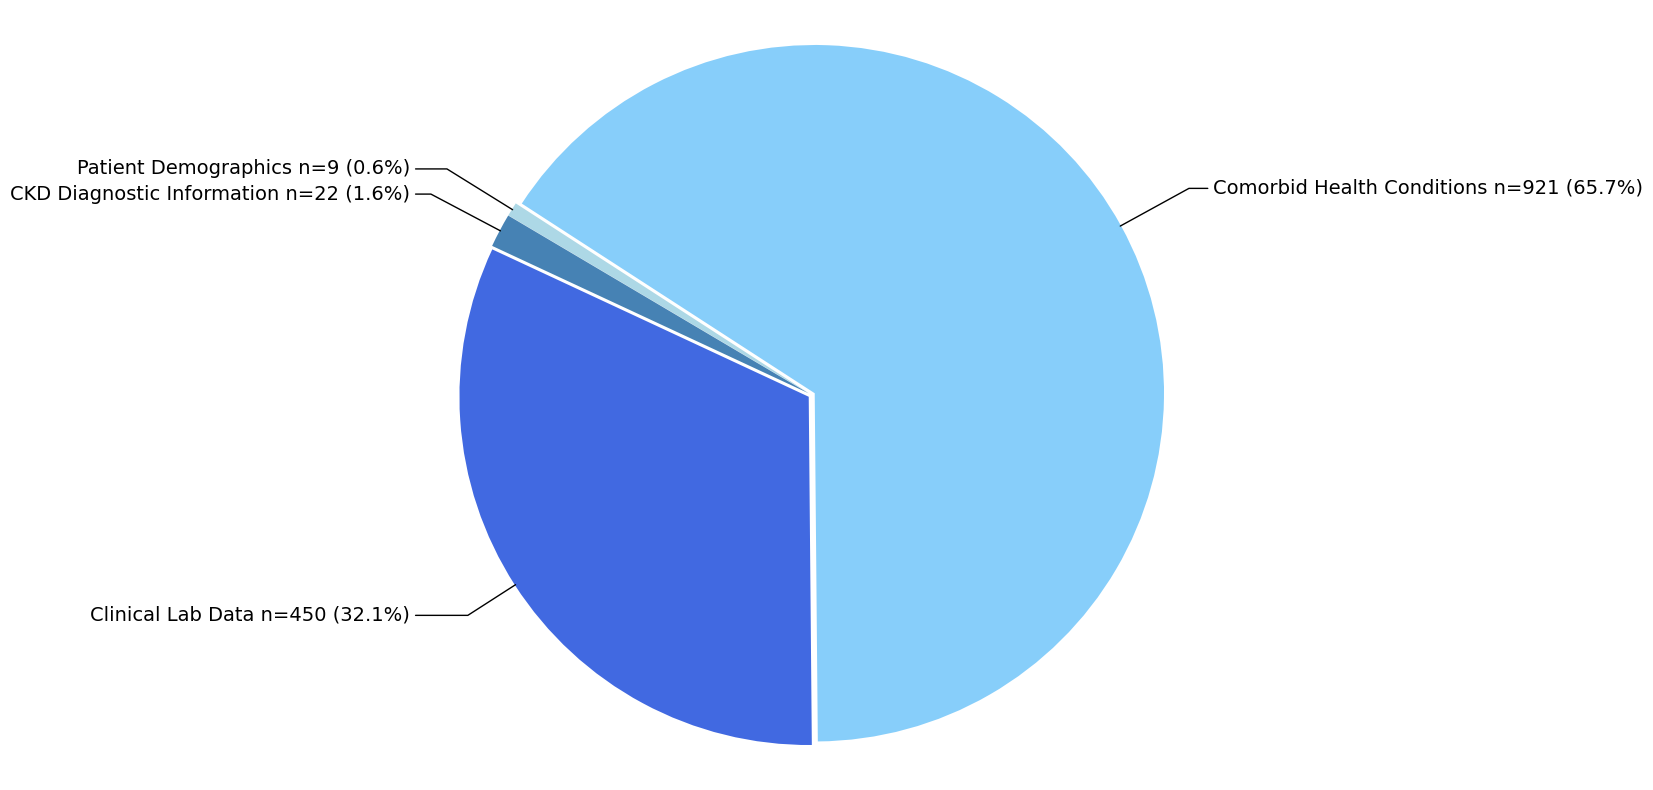

In [7]:
# Data for the pie chart
labels = ['Patient Demographics', 'CKD Diagnostic Information', 'Clinical Lab Data', 'Comorbid Health Conditions']
sizes = [9, 22, 450, 921]
colors = ['#add8e6', '#4682b4',  '#4169e1', '#87cefa']  # Light to dark blue
explode = (0.01, 0.01, 0.01, 0.01)  # Explode parameter to create a 3D effect

# Create pie chart
plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(
    sizes, colors=colors, startangle=147, pctdistance=0.85, explode=explode
)

# Draw the leader lines and place the labels outside the pie chart
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    ang = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]

    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    plt.annotate(
        f"{label} n={sizes[i]} ({sizes[i]/sum(sizes)*100:.1f}%)",
        xy=(x, y), xytext=(1.15*np.sign(x), 1.2*y),
        horizontalalignment=horizontalalignment,
        fontsize=14,
        arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='black')        
    )

# Equal aspect ratio
plt.axis('equal')

# Save the plot as a PNG file
plt.savefig("PieChartFeatures.png", format="png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()